In [4]:
using DataFrames
using FFTW
using Plots

## Discrete Fourier Transform (DFT)
Here we define the DFT as a change of basis in $\mathbf{C}^N$, and signals are elements $x[n] \in \mathbf{C}^N$. First, define some utility functions.

In [5]:
function change_of_basis(N::Int)::Array{Complex{Float64},2}
    freq = 2*pi / N
    W = cis(-freq)
    
    return [W^(i*j) for i=0:N-1, j=0:N-1]
end

change_of_basis (generic function with 1 method)

In [6]:
dft(x::Array) = change_of_basis(size(x, 1)) * x

dft (generic function with 1 method)

Let's try what it looks like !

In [20]:
samples = collect(0:99)
x = sin.(samples)
X = dft(x)

100-element Array{Complex{Float64},1}:
 0.37919462744933863 + 0.0im
  0.3797378702915219 + 0.034731554741213394im
 0.38139386046127355 + 0.07023318063623613im
  0.3842446083744874 + 0.10733788627362095im
 0.38843831085117775 + 0.1470156937964785im
 0.39420958447424725 + 0.1904735051988945im
  0.4019149831331179 + 0.23930421410578057im
  0.4120947671467532 + 0.2957275273582912im
 0.42558336505637784 + 0.3630064469278416im
 0.44371721411204224 + 0.4462194319183619im
  0.4687547246613235 + 0.5538109170098108im
  0.5048100361898231 + 0.7010301325459966im
  0.5602187376484808 + 0.918635428171825im
                     ⋮
  0.5602187376490768 - 0.9186354281717218im
  0.5048100361903014 - 0.7010301325459158im
  0.4687547246617214 - 0.5538109170097513im
 0.44371721411238885 - 0.4462194319183143im
  0.4255833650566869 - 0.3630064469278069im
  0.4120947671470345 - 0.2957275273582663im
  0.4019149831333759 - 0.23930421410576774im
 0.39420958447448906 - 0.1904735051988924im
 0.38843831085140523 - 0

We can compare to the results obtained with the Fast Fourier Transform (FFT) of the package FFTW.

In [21]:
X_pkg = fft(x)

100-element Array{Complex{Float64},1}:
  0.3791946274493381 + 0.0im
 0.37973787029151906 + 0.03473155474121391im
  0.3813938604612703 + 0.07023318063623715im
 0.38424460837448227 + 0.10733788627362228im
  0.3884383108511704 + 0.14701569379648305im
  0.3942095844742362 + 0.1904735051989015im
  0.4019149831331056 + 0.23930421410579183im
  0.4120947671467358 + 0.29572752735830427im
  0.4255833650563547 + 0.3630064469278601im
  0.4437172141120128 + 0.4462194319183872im
   0.468754724661285 + 0.5538109170098433im
  0.5048100361897736 + 0.7010301325460409im
  0.5602187376484123 + 0.918635428171889im
                     ⋮
  0.5602187376484125 - 0.9186354281718891im
  0.5048100361897735 - 0.7010301325460411im
   0.468754724661285 - 0.5538109170098433im
   0.443717214112013 - 0.44621943191838714im
 0.42558336505635463 - 0.3630064469278601im
  0.4120947671467357 - 0.29572752735830427im
  0.4019149831331039 - 0.2393042141057895im
 0.39420958447423615 - 0.19047350519890083im
  0.3884383108511704 

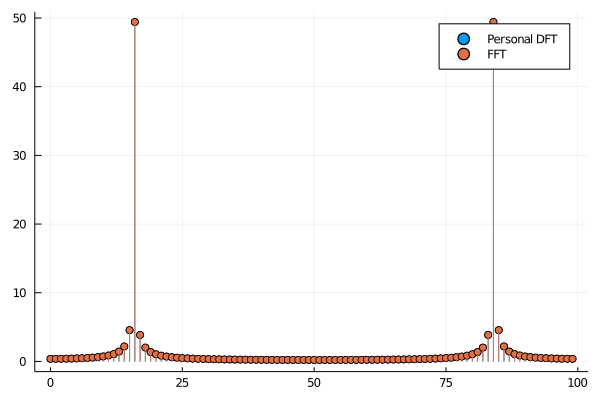

In [22]:
plot(samples, abs.(X), line=:stem, marker=:circle, label="Personal DFT")
plot!(samples, abs.(X_pkg) , line=:stem, marker=:circle, label="FFT")

Results are pretty close, there are only very slight differences probably due to numerical properties of the implementations.

In [23]:
function plot_magnitude_dft(X::Array{Complex{T},1}) where {T<:Real}
    plot(collect(0:length(X)-1), abs.(X), line=:stem, marker=:circle, label="DFT")
end

plot_magnitude_dft (generic function with 2 methods)

Here are the DFT for some signals.

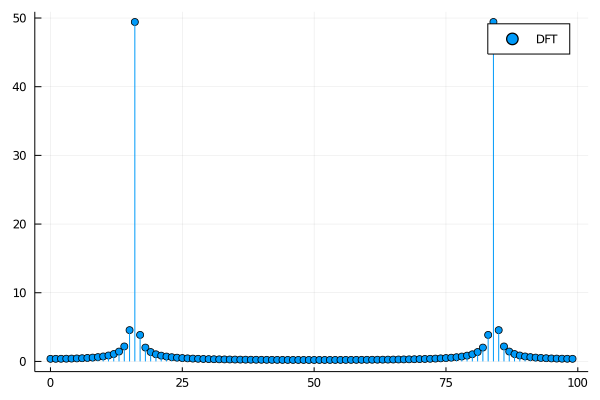

In [24]:
plot_magnitude_dft(X)

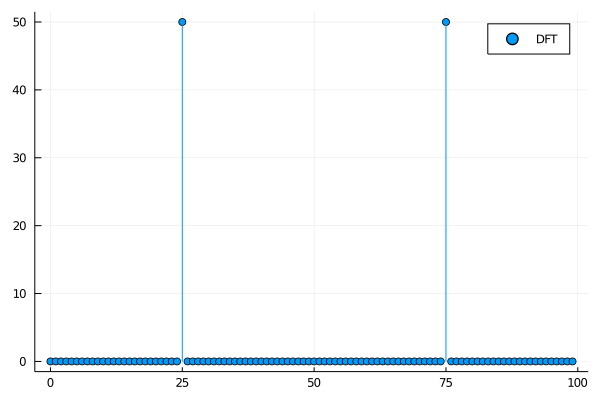

In [25]:
plot_magnitude_dft(dft(cos.(2*pi / 100 * 25 .*samples)))